## Principles and Applications of Data Science (Spring 2022)
## Homework 2
## Due: Jun 15, 2022

### Name:  陳廷豪
### Student ID Number:  110598040

### Homework Description
This assignment is to practice creating a bar graph grid using the tool such as MatPlotLib with Taipei’s traffic accident data from year 101 (2012) to 108 (2019). The files we provide are the data files (xxxTraffic accident.csv) of eight years and a correspondence table for mapping codes to certain fields (Traffic accident chart.csv). In the data file, there are fifteen attributes, including ***Year, Month, Day, Hour, Minute, Processing class, death toll, Injuries Person, Vehicle type, Sex, Age, Weather, Speed limit, Road pattern, Accident location***. With the data files and table, your homework should be done according to the following **requirements**:

#### There are six main topics to be shown in each year:  
   <font color=green> 1. Number of traffic accident death toll per month <br>
   2. Number of traffic accident injuries per month <br>
   3. Number of traffic accident injuries per vehicle type (take the top 10) <br>
   4. Number of traffic accident injuries per weather <br>
   5. Number of traffic accident injuries per road pattern (take the top 10) <br>
   6. Number of traffic accident injuries per accident location (take the top 10) <br>
   </font>
#### Each topic will be presented by a bar chart.   
#### For each year, use bar graph grid to show the six topics. Thus, there will be eight grids for years and each grid has six bar charts for each topic.  

#### On the other hand, please produce the grids for the six topics respectively. Each grid will have eight bar charts for the eight years.  

#### Please do not forget, in each chart, to have the topic on the top and label the x-axis and y-axis.
#### Sample:
 
**<font color=green size=2> Year: 101 </font>** 
![HW2sample_1.png](HW2sample_1.png)
**<font color=green size=2> Topic: top 10 Accident_location </font>** 
![HW2sample_2.png](HW2sample_2.png)

In [17]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def generate_Histogram_picture_force_year( years_of_list, year_of_dataset_pathList ):
    for i in range(len(year_of_dataset_pathList)): 
        
        # 讀取資料集和資料集年份
        dataset = pd.read_csv( year_of_dataset_pathList[i] )
        dataset_years =  years_of_list[i]
        
        # 生成6張長條圖
        single_picture_data_preprocessing(dataset, dataset_years, "Month", "death_toll", 0, isTop10=False)
        single_picture_data_preprocessing(dataset, dataset_years, "Month", "Injuries_Person", 1, isTop10=False)
        single_picture_data_preprocessing(dataset, dataset_years, "Vehicle_type", "Injuries_Person", 2, isTop10=True)
        single_picture_data_preprocessing(dataset, dataset_years, "Weather", "Injuries_Person", 3, isTop10=False)
        single_picture_data_preprocessing(dataset, dataset_years, "Road_pattern", "Injuries_Person", 4, isTop10=True)
        single_picture_data_preprocessing(dataset, dataset_years, "Accident_location", "Injuries_Person", 5, isTop10=True)
        
        # 展示長條圖
        plt.show()
        
        
        
def single_picture_data_preprocessing(dataset, year_of_dataset, rowName, columnName, pltIndex, isTop10):
    if(isTop10):
        processed_dataset = dataset.groupby(by=[rowName]).sum().sort_values(by=[columnName],ascending=False).head(10).reset_index()
    else:
        processed_dataset = dataset.groupby(by=[rowName]).sum().sort_values(by=[columnName],ascending=False).reset_index()
        
    plt.sca(axes_force_year[ pltIndex ]);
    x = np.arange( len(processed_dataset[rowName]) )
    plt.bar( x, processed_dataset[columnName] , color="orange")
    plt.xticks( x, processed_dataset[rowName] )
    plt.xlabel( rowName )
    plt.ylabel( columnName )
    
    if(isTop10):
        plt.title( year_of_dataset+ " " + columnName + "(TOP 10 " + rowName + ")")
    else:
        plt.title( year_of_dataset+ " " + columnName + "(" + rowName + ")")

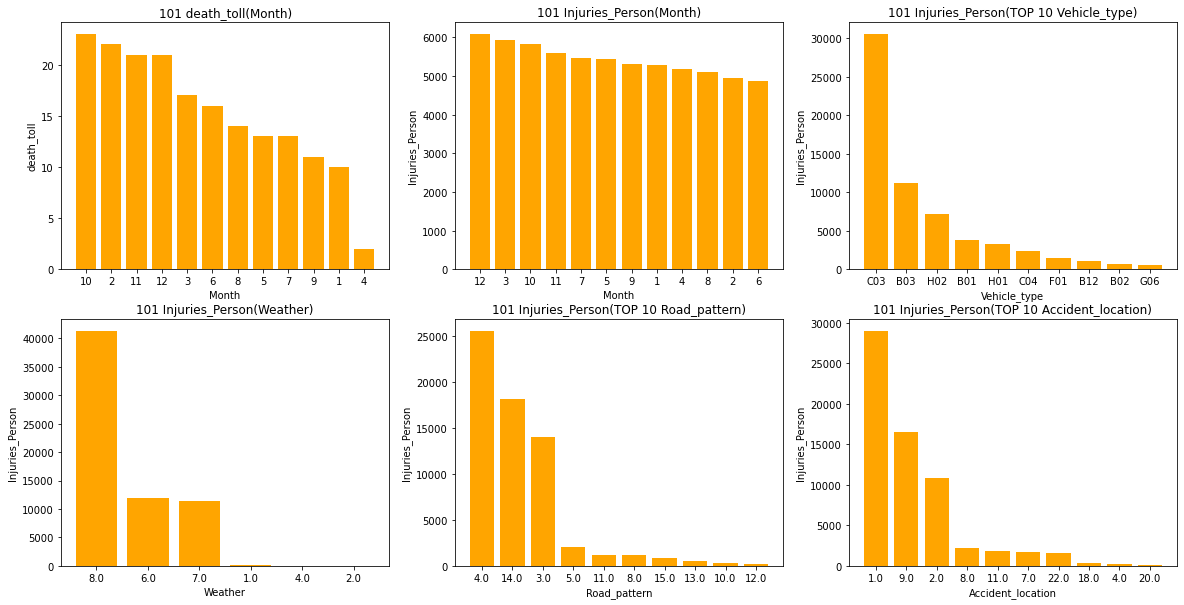

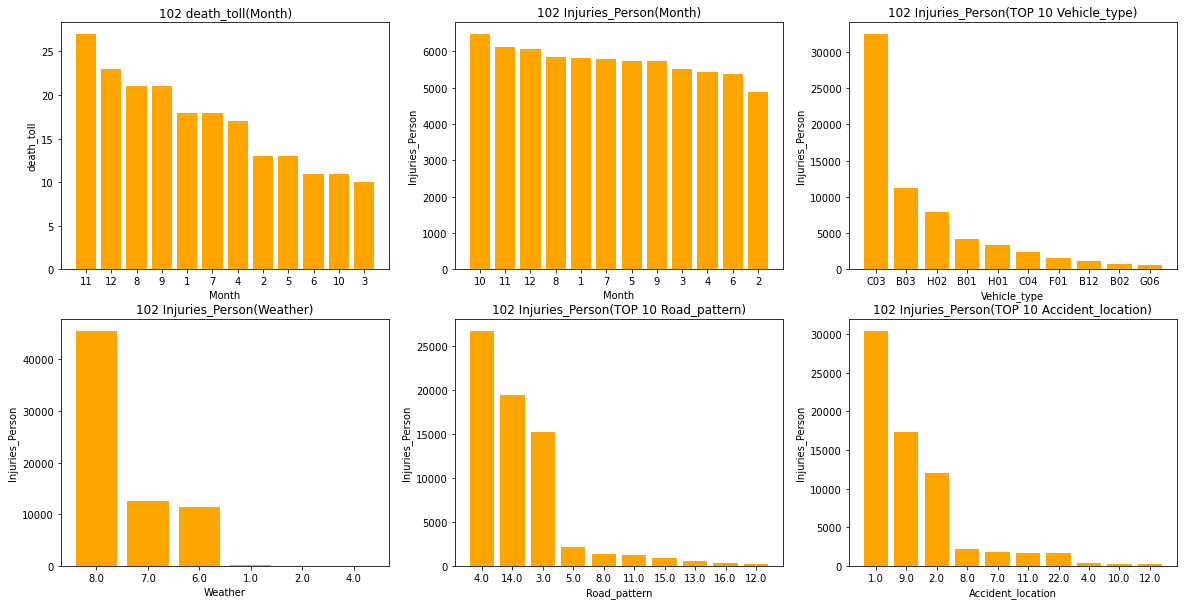

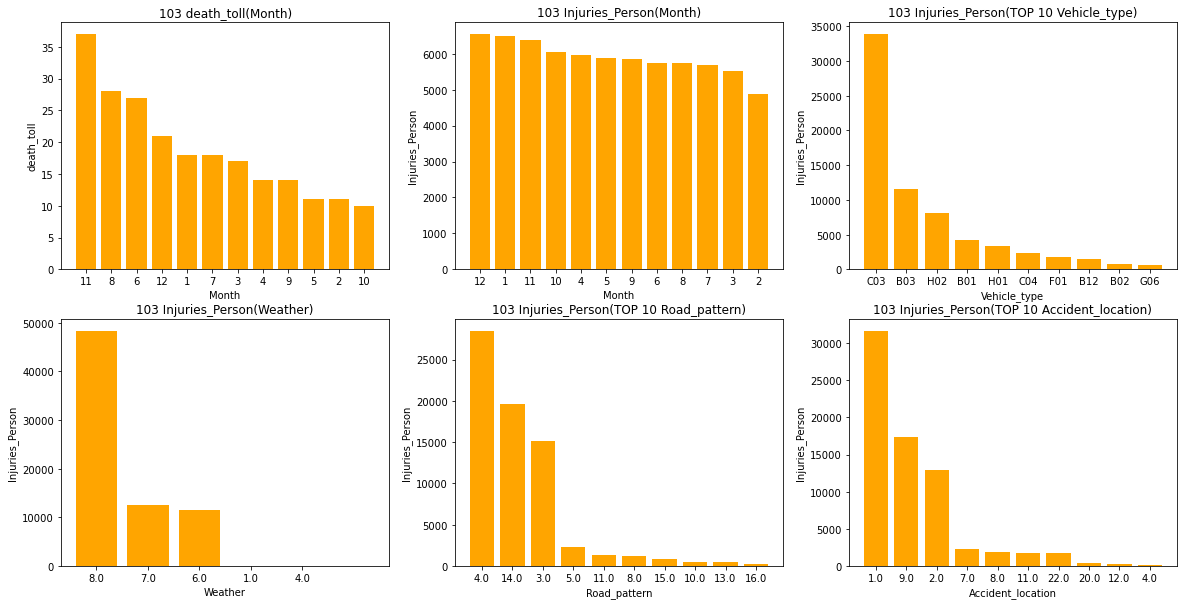

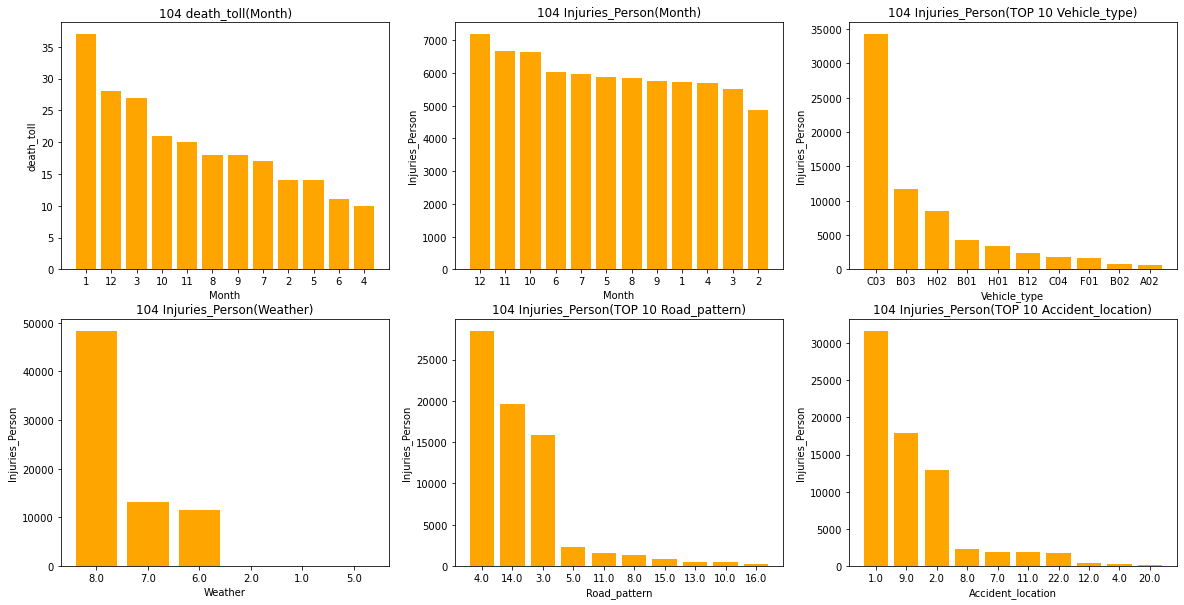

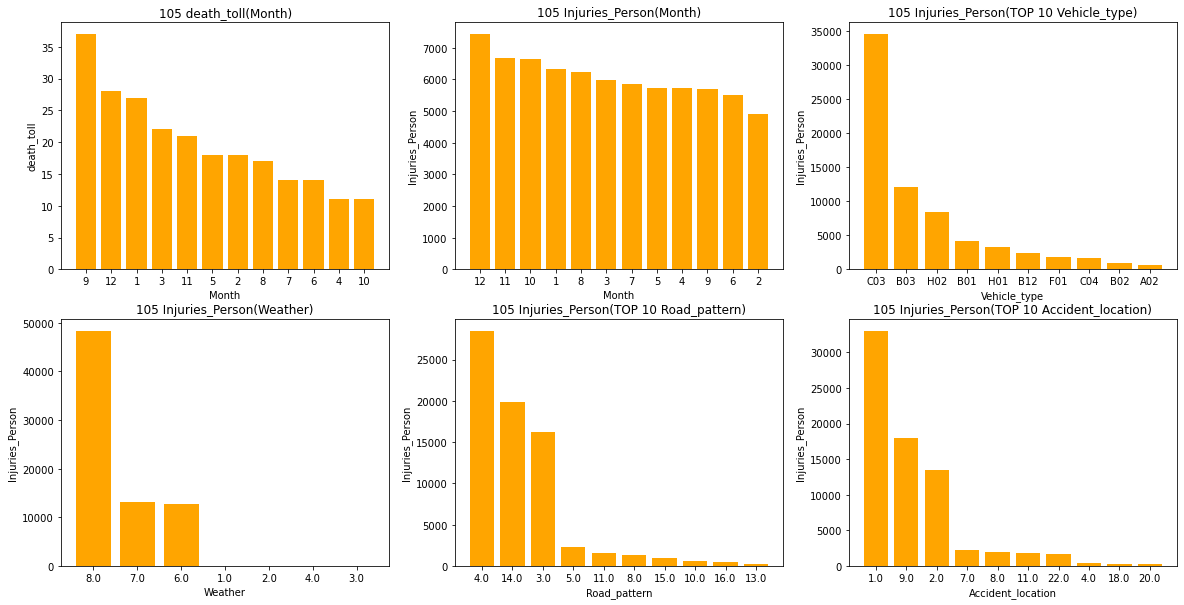

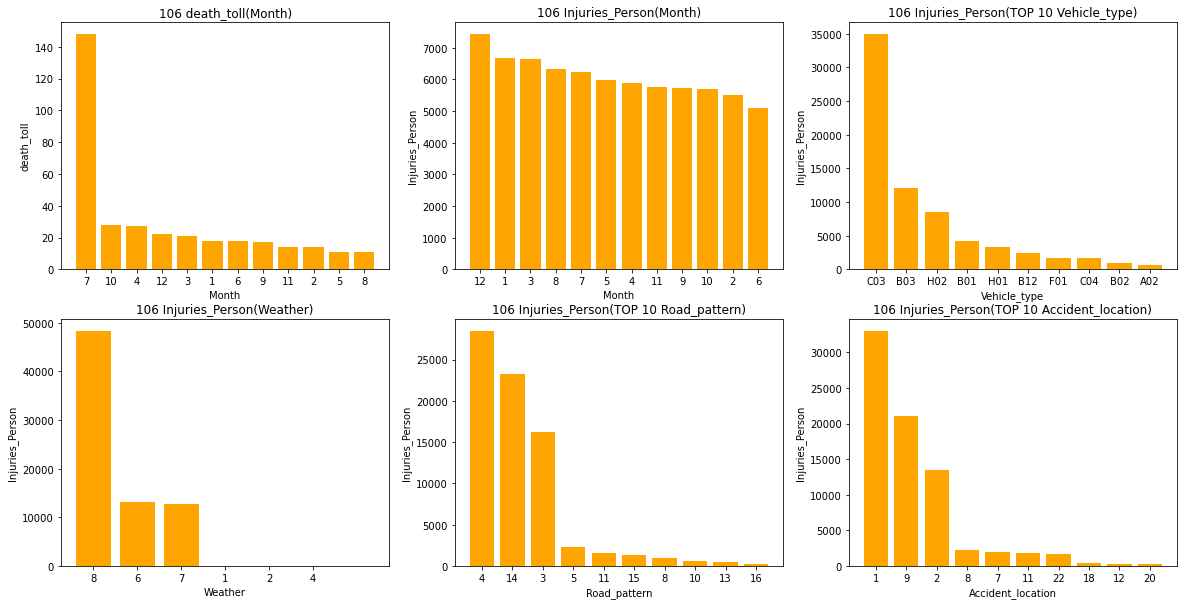

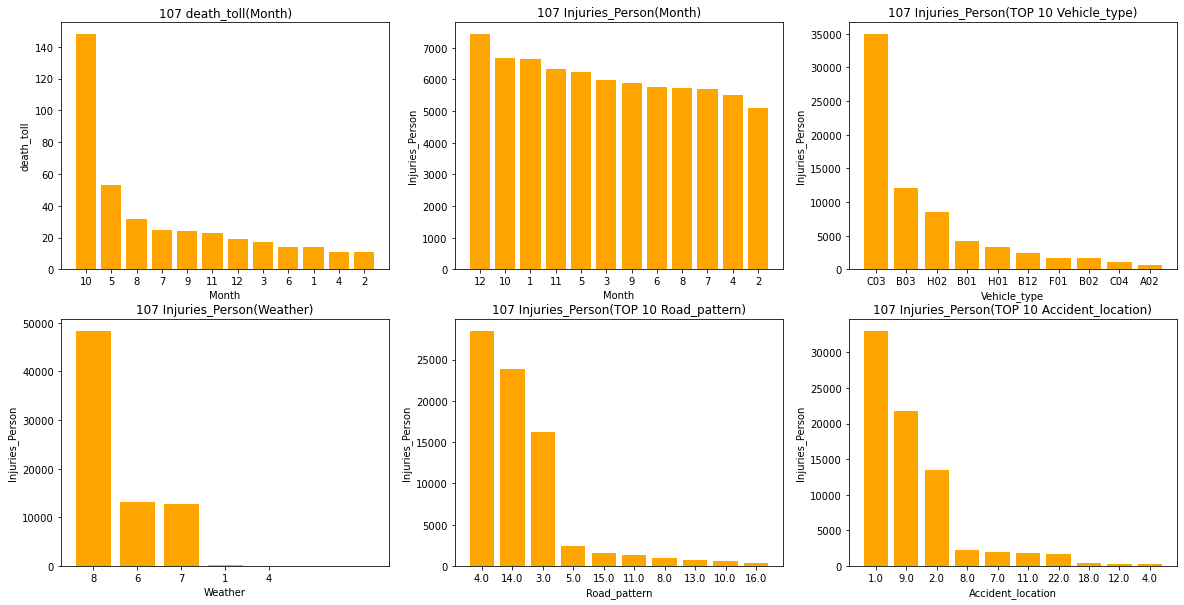

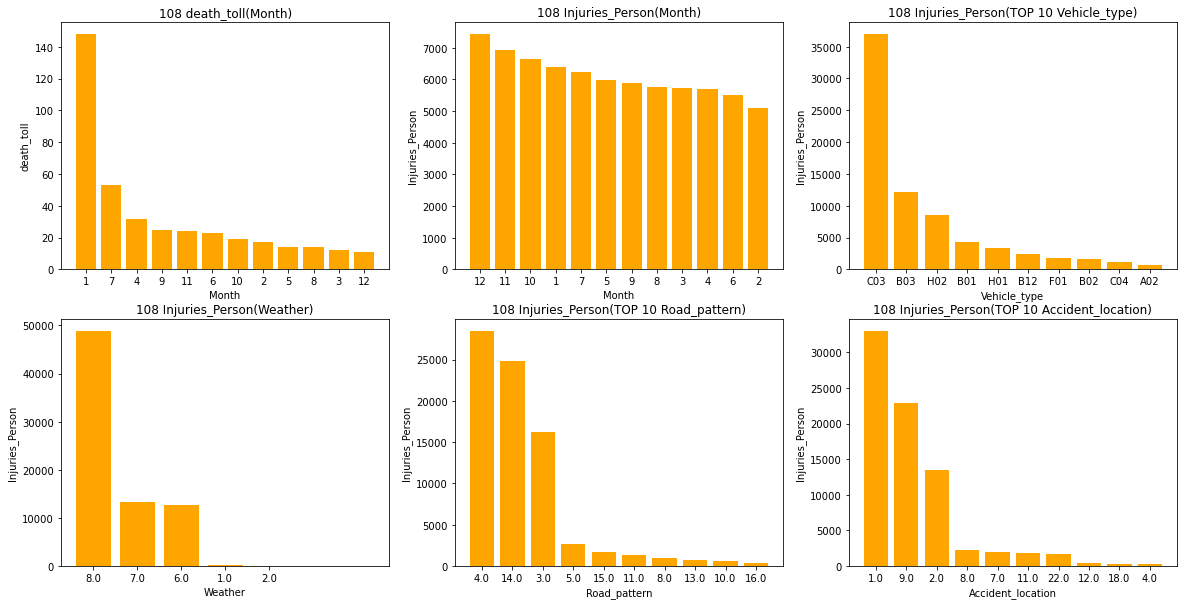

In [19]:
# init variable
dataset_filePath_list = []
dataset_years = []
dateset_folder_path = "./Traffic_accident_dataset/"

# 取出folder裡面的所有file
file_of_folder = os.listdir( dateset_folder_path )

# 取出dataset的年份
for file in file_of_folder:
    dataset_years.append( file[0:3] )
    dataset_filePath_list.append( dateset_folder_path + file ); 

# 生成2*3的格狀長條圖格式
fig_force_year, axes_force_year = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
axes_force_year = axes_force_year.flatten()

# main function
generate_Histogram_picture_force_year(dataset_years, dataset_filePath_list)

In [20]:
def single_picture_data_preprocessing_force_topic(dataset, year, rowName, columnName, pltIndex, isTop10):
    if(isTop10):
        processed_dataset = dataset.groupby(by=[rowName]).sum().sort_values(by=[columnName],ascending=False).head(10).reset_index()
    else:
        processed_dataset = dataset.groupby(by=[rowName]).sum().sort_values(by=[columnName],ascending=False).reset_index()
        
    plt.sca(axes_force_topic[ pltIndex ]);
    x = np.arange( len(processed_dataset[rowName]) )
    plt.bar( x, processed_dataset[columnName] , color="orange")
    plt.xticks( x, processed_dataset[rowName] )
    plt.xlabel( rowName )
    plt.ylabel( columnName )
    
    if(isTop10):
        plt.title( year + " " + columnName + "(TOP 10 " + rowName + ")")
    else:
        plt.title( year + " " + columnName + "(" + rowName + ")")

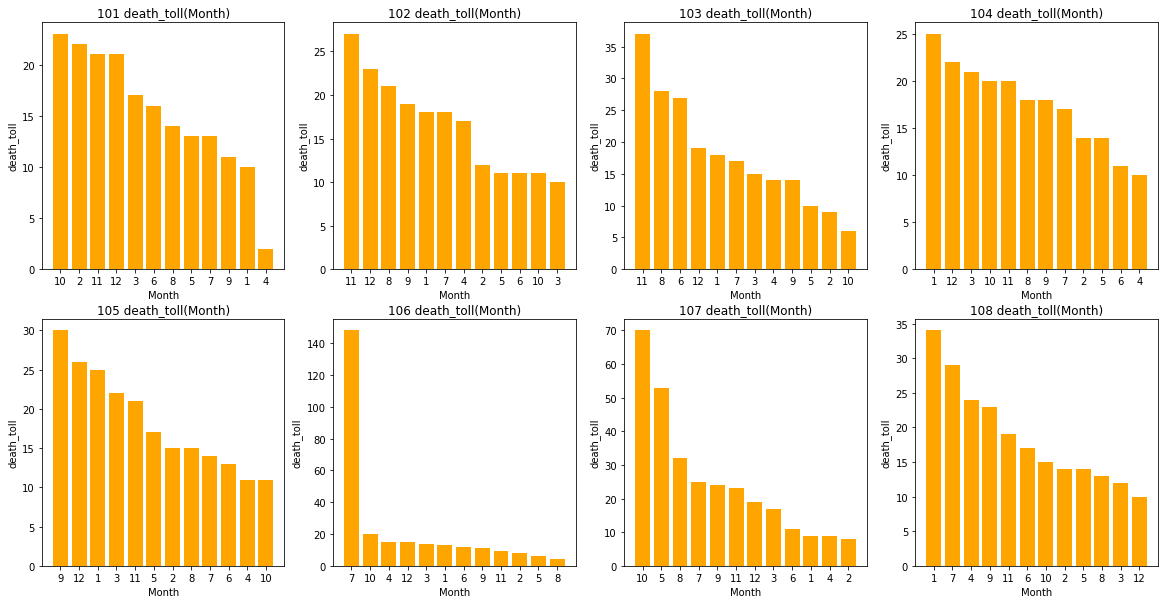

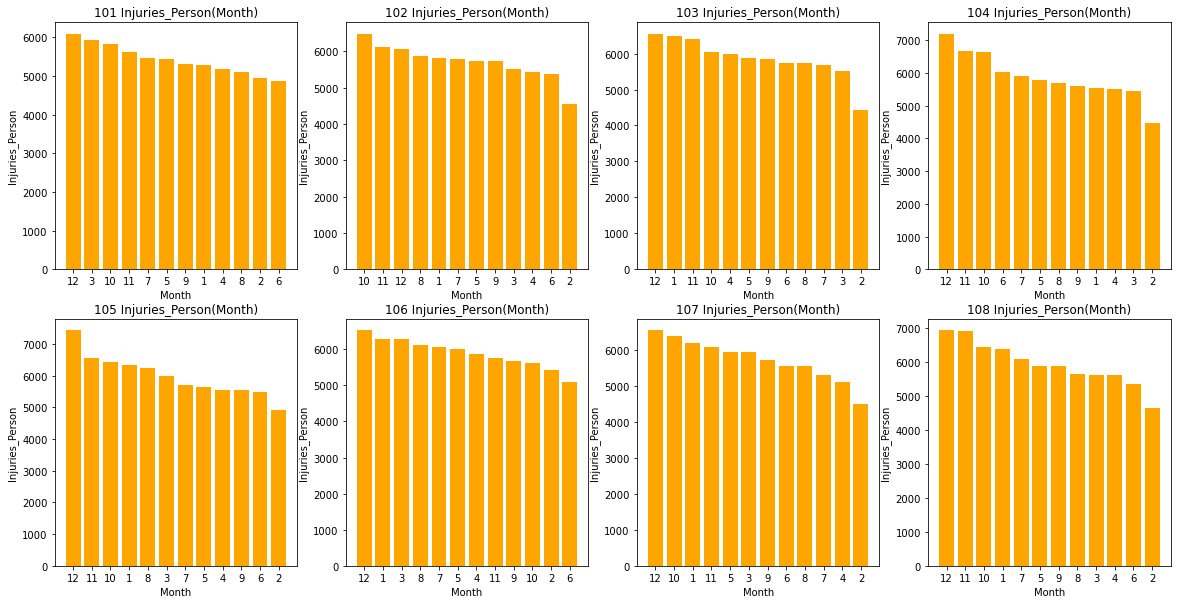

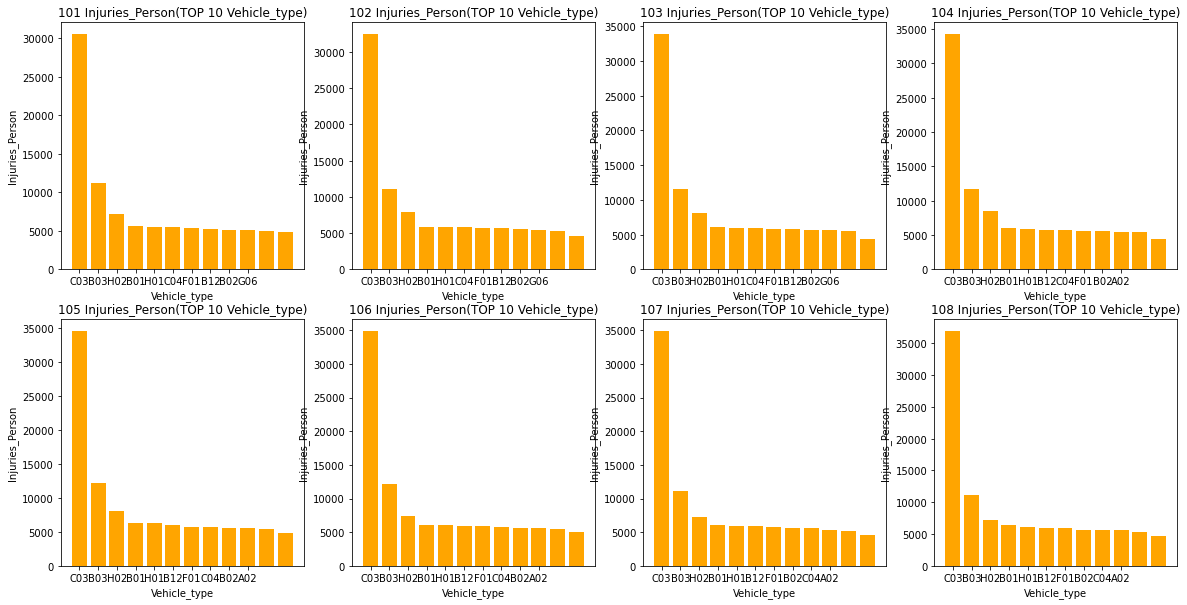

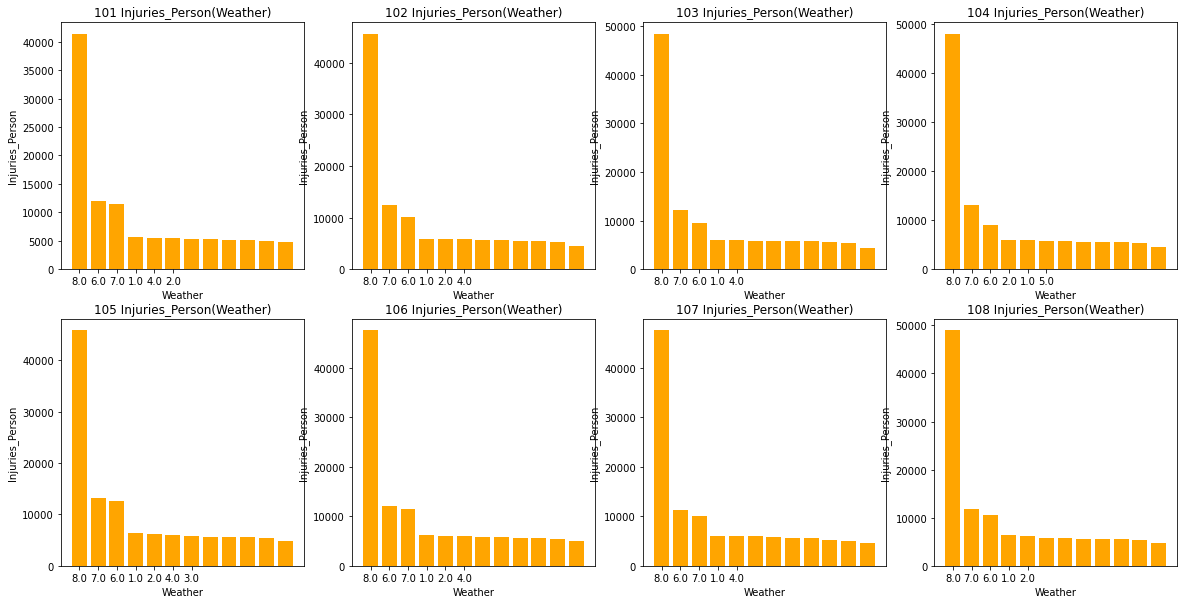

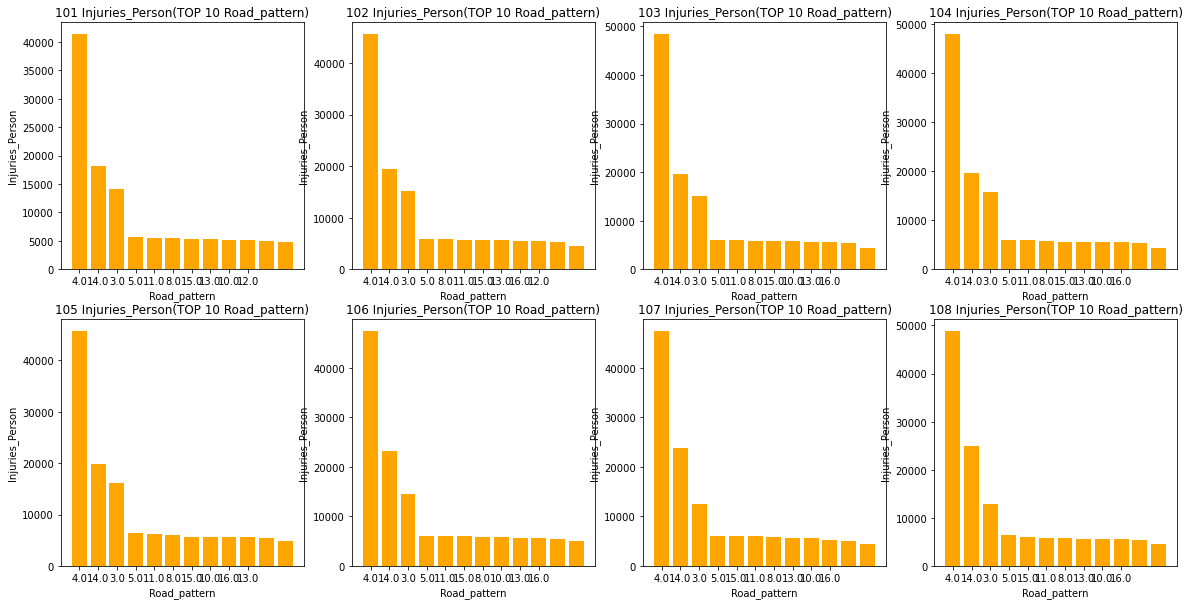

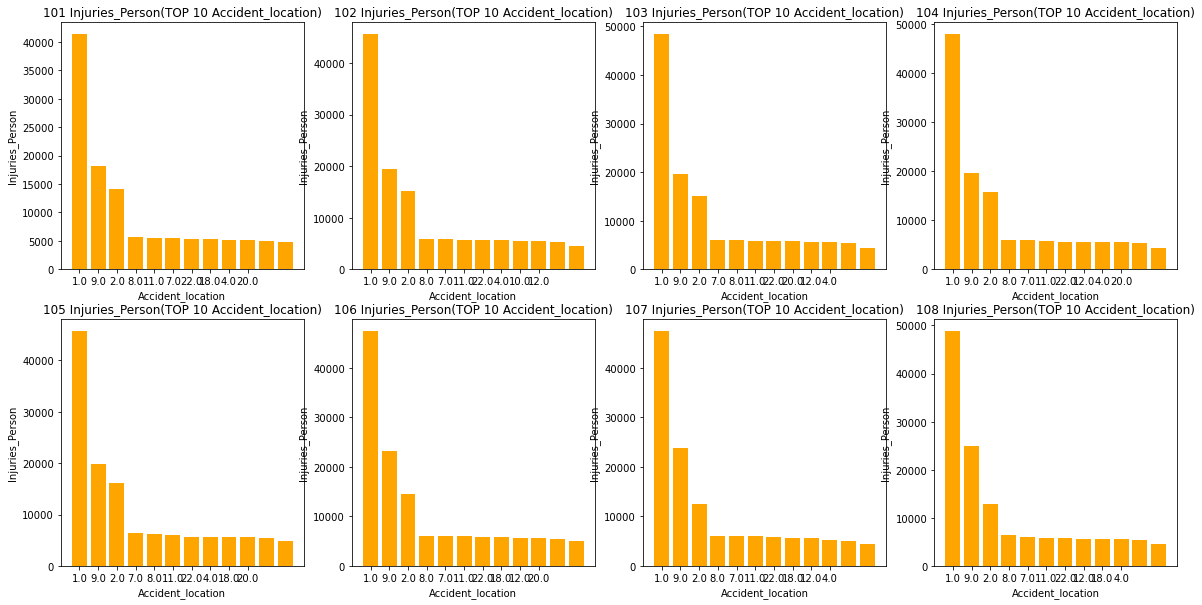

In [21]:
topics = [ ["Month", "death_toll", False], ["Month", "Injuries_Person", False], ["Vehicle_type", "Injuries_Person", True], ["Weather", "Injuries_Person", False], ["Road_pattern", "Injuries_Person", True], ["Accident_location", "Injuries_Person", True]]

# get all csv data into one variable
merge_csv = pd.DataFrame();
dateset_folder_path = "./Traffic_accident_dataset/"
file_of_folder = os.listdir( dateset_folder_path )

for file in file_of_folder:
    file_path = os.path.abspath(dateset_folder_path + file);
    dataframe = pd.read_csv( file_path );
    
    if(merge_csv.empty == False):
        merge_csv = pd.concat([merge_csv, dataframe], ignore_index=True);
    else:
        merge_csv =  dataframe;

# 生成2*4的格狀長條圖格式       
fig_force_topic, axes_force_topic = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
axes_force_topic = axes_force_topic.flatten()

# for loop to get 6 topic in each year  
for i in range(len(topics)):
    single_picture_data_preprocessing_force_topic( merge_csv[merge_csv['Year'] == 101], "101", topics[i][0], topics[i][1], 0, isTop10=topics[i][2] )
    single_picture_data_preprocessing_force_topic( merge_csv[merge_csv['Year'] == 102], "102", topics[i][0], topics[i][1], 1, isTop10=topics[i][2] )
    single_picture_data_preprocessing_force_topic( merge_csv[merge_csv['Year'] == 103], "103", topics[i][0], topics[i][1], 2, isTop10=topics[i][2] )
    single_picture_data_preprocessing_force_topic( merge_csv[merge_csv['Year'] == 104], "104", topics[i][0], topics[i][1], 3, isTop10=topics[i][2] )
    single_picture_data_preprocessing_force_topic( merge_csv[merge_csv['Year'] == 105], "105", topics[i][0], topics[i][1], 4, isTop10=topics[i][2] )
    single_picture_data_preprocessing_force_topic( merge_csv[merge_csv['Year'] == 106], "106", topics[i][0], topics[i][1], 5, isTop10=topics[i][2] )
    single_picture_data_preprocessing_force_topic( merge_csv[merge_csv['Year'] == 107], "107", topics[i][0], topics[i][1], 6, isTop10=topics[i][2] )
    single_picture_data_preprocessing_force_topic( merge_csv[merge_csv['Year'] == 108], "108", topics[i][0], topics[i][1], 7, isTop10=topics[i][2] )
    plt.show()